In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import tqdm
from ast import literal_eval
import numpy as np
from PIL import Image
%matplotlib inline 

In [2]:
def concat(x):
    w = []
    for i in range(len(x)):
        if x[i][1] == 'Noun' or x[i][1] == 'Number':
            try:
                if x[i-1][1] == 'Modifier':
                    pass
                else:
                    w.append(x[i][0])
            except:
                pass
        elif x[i][1] == 'Suffix':
            try:
                w.pop()
                w.append(x[i-1][0] + x[i][0])
            except:
                pass
        elif x[i][1] == 'Modifier':
            try:
                w.append(x[i][0] + x[i+1][0])
            except:
                pass
    return w

In [3]:
sd = pd.read_csv('서담_8월업데이트.txt', sep = '|',
                converters={'comment_num' : literal_eval, 'like': literal_eval,
                            'view' : literal_eval, 'dislike' : literal_eval,
                            'word_token' : literal_eval})


sd['w'] = sd['word_token'].apply(lambda x: concat(x))
sd

Unnamed: 0                                 title header  comment_num  \
0              0            도대체가 학교의 기준이 무엇인지 이해가 안됩니다    NaN           14   
1              1  학교 시설물 관련 부서 전화번호 적을테니 내일부터 전화 한통씩하자    NaN           10   
2              2                        걍 서강사이버대학으로 하자    NaN           10   
3              3                             학교 너무 빡친다     쉐복           54   
4              4                    박미선 누님 결혼식날 비 오셨죠?    NaN            2   
...          ...                                   ...    ...          ...   
8214        8214                            새해맞이 연게 첫글    NaN            5   
8215        8215                            올해는 행시합격한다    NaN            5   
8216        8216                     ??? : 야 올해가 몇년이냐?    NaN            9   
8217        8217                        2020년 서강의 첫 모습    NaN            5   
8218        8218                           2020년 파이팅!!    NaN           15   

     writer  like upload_date  view  \
0        익명    32       46분 전   429   
1        익명    38       48분 전   577   
2        익명    42       55분 전   564   
3        익명   106       18:24  1830   
4        익명    40       17:44   824   
...     ...   ...         ...   ...   
8214     익명    35       01/01   785   
8215     익명    86       01/01  1180   
8216     익명   127       01/01  1982   
8217     익명   101       01/01  1931   
8218     익명   168       01/01  1335   

                                                   link  borad  \
0     http://www.ssodam.com//content/980179?prev=1&p...    CPA   
1     http://www.ssodam.com//content/980177?prev=1&p...    익게2   
2     http://www.ssodam.com//content/980173?prev=1&p...    익게2   
3     http://www.ssodam.com//content/980162?prev=1&p...    익게2   
4     http://www.ssodam.com//content/980129?prev=1&p...    익게2   
...                                                 ...    ...   
8214  http://www.ssodam.com//content/813081?prev=245...  연애상담소   
8215  http://www.ssodam.com//content/813062?prev=245...    익게2   
8216  http://www.ssodam.com//content/813058?prev=245...    익게2   
8217  http://www.ssodam.com//content/813047?prev=245...    익게2   
8218  http://www.ssodam.com//content/813032?prev=245...    익게2   

                                                   text  dislike  \
0     교육부 방역수칙이 도대체 어떤 점에서 어떻게 미달이 되는데요? 이걸 알려주셔야죠미달...        0   
1     코로나 이후로 전화 자주하는편인데 나도 처음에 어디로 전화해야할지도 막막하고 그래서...        3   
2     학교 부지는 외부인 등산하게 냅두고운동장 농구장은 외부인들한테 24시간 무료개방하고...        7   
3     다른 학교는 감염 위험이 없어서 시설 개방하는 줄 아냐? 아니 등록금은 다 쳐받아놓...       13   
4                                    마지막 ㅋ 하나 붙인게 킬포ㅋㅋㅋ        1   
...                                                 ...      ...   
8214                                다들 올해는  인생의 단짝을 만나용        0   
8215  토모관 여러분도\n\n\n            \n\n            \n  ...        0   
8216                                            다들 새해복!        0   
8217  방금 토모관에서 나와서 찍어봤어20대의 절반을 서강과 함께할수 있어서 진심으로 행복...        0   
8218                                          모두들 파이팅!!        0   

                                                comment            date_time  \
0     [['근데 아직 확정?은 아니지 않나요 아직까지는 그냥 누군가가 그렇다더라니까 기다...  2020-08-13 19:01:00   
1     [['저런 곳보다 대책회의쪽이 더 확실할텐데 총학도 회의에 몇번 참관한걸로 아는데 ...  2020-08-13 18:59:00   
2     [['그만•••'], ['뭘 그만하라는거야?'], ['이런 댓글이야 말로 그만......  2020-08-13 18:52:00   
3     [['교육부 지침에 안맞으면 못여는건가?'], ['어떻게 다른대학들은 5~6월에 고...  2020-08-13 18:24:00   
4     [['난 오셨다길래 정지훈 얘기하는 줄'], ['??? : 모르는데 어떻게가요'],...  2020-08-13 17:44:00   
...                                                 ...                  ...   
8214  [['네에 ㅠㅠ 올해는 정말 행복하고 싶어요.. 님두 좋은 인연 만나서 행복하세요 ...  2020-01-01 00:24:00   
8215  [['나도 행시 올 해 붙는다!'], ['나도 올해 붙는다!'], ['민특상디 사례...  2020-01-01 00:08:00   
8216  [['좌우로 정렬해주세여'], ['ㅁㅊ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 적절한 짤 추'], ['...  2020-01-01 00:06:00   
8217  [['나도 방금 나왔는데 ㅎㅎㅎ 다미 본듯'], ['내년에는 좋은 소식만 들리자!!...  2020-01-01 00:04:00   
8218  [['올 첫글 ㅋㅋ'], ['아 너 뭔데 나보다 일찍 썼냐ㅡㅡ추천이나 먹어라'], ...  2020-01-01 00:00:00   

      hour                   

In [4]:
def monthly (x) :
    if ':' in x:
        return int(8)
    else :
        return int(x[1])

In [5]:
sd['month'] = sd.upload_date.apply(lambda x : monthly(x))
sd

Unnamed: 0                                 title header  comment_num  \
0              0            도대체가 학교의 기준이 무엇인지 이해가 안됩니다    NaN           14   
1              1  학교 시설물 관련 부서 전화번호 적을테니 내일부터 전화 한통씩하자    NaN           10   
2              2                        걍 서강사이버대학으로 하자    NaN           10   
3              3                             학교 너무 빡친다     쉐복           54   
4              4                    박미선 누님 결혼식날 비 오셨죠?    NaN            2   
...          ...                                   ...    ...          ...   
8214        8214                            새해맞이 연게 첫글    NaN            5   
8215        8215                            올해는 행시합격한다    NaN            5   
8216        8216                     ??? : 야 올해가 몇년이냐?    NaN            9   
8217        8217                        2020년 서강의 첫 모습    NaN            5   
8218        8218                           2020년 파이팅!!    NaN           15   

     writer  like upload_date  view  \
0        익명    32       46분 전   429   
1        익명    38       48분 전   577   
2        익명    42       55분 전   564   
3        익명   106       18:24  1830   
4        익명    40       17:44   824   
...     ...   ...         ...   ...   
8214     익명    35       01/01   785   
8215     익명    86       01/01  1180   
8216     익명   127       01/01  1982   
8217     익명   101       01/01  1931   
8218     익명   168       01/01  1335   

                                                   link  borad  \
0     http://www.ssodam.com//content/980179?prev=1&p...    CPA   
1     http://www.ssodam.com//content/980177?prev=1&p...    익게2   
2     http://www.ssodam.com//content/980173?prev=1&p...    익게2   
3     http://www.ssodam.com//content/980162?prev=1&p...    익게2   
4     http://www.ssodam.com//content/980129?prev=1&p...    익게2   
...                                                 ...    ...   
8214  http://www.ssodam.com//content/813081?prev=245...  연애상담소   
8215  http://www.ssodam.com//content/813062?prev=245...    익게2   
8216  http://www.ssodam.com//content/813058?prev=245...    익게2   
8217  http://www.ssodam.com//content/813047?prev=245...    익게2   
8218  http://www.ssodam.com//content/813032?prev=245...    익게2   

                                                   text  dislike  \
0     교육부 방역수칙이 도대체 어떤 점에서 어떻게 미달이 되는데요? 이걸 알려주셔야죠미달...        0   
1     코로나 이후로 전화 자주하는편인데 나도 처음에 어디로 전화해야할지도 막막하고 그래서...        3   
2     학교 부지는 외부인 등산하게 냅두고운동장 농구장은 외부인들한테 24시간 무료개방하고...        7   
3     다른 학교는 감염 위험이 없어서 시설 개방하는 줄 아냐? 아니 등록금은 다 쳐받아놓...       13   
4                                    마지막 ㅋ 하나 붙인게 킬포ㅋㅋㅋ        1   
...                                                 ...      ...   
8214                                다들 올해는  인생의 단짝을 만나용        0   
8215  토모관 여러분도\n\n\n            \n\n            \n  ...        0   
8216                                            다들 새해복!        0   
8217  방금 토모관에서 나와서 찍어봤어20대의 절반을 서강과 함께할수 있어서 진심으로 행복...        0   
8218                                          모두들 파이팅!!        0   

                                                comment            date_time  \
0     [['근데 아직 확정?은 아니지 않나요 아직까지는 그냥 누군가가 그렇다더라니까 기다...  2020-08-13 19:01:00   
1     [['저런 곳보다 대책회의쪽이 더 확실할텐데 총학도 회의에 몇번 참관한걸로 아는데 ...  2020-08-13 18:59:00   
2     [['그만•••'], ['뭘 그만하라는거야?'], ['이런 댓글이야 말로 그만......  2020-08-13 18:52:00   
3     [['교육부 지침에 안맞으면 못여는건가?'], ['어떻게 다른대학들은 5~6월에 고...  2020-08-13 18:24:00   
4     [['난 오셨다길래 정지훈 얘기하는 줄'], ['??? : 모르는데 어떻게가요'],...  2020-08-13 17:44:00   
...                                                 ...                  ...   
8214  [['네에 ㅠㅠ 올해는 정말 행복하고 싶어요.. 님두 좋은 인연 만나서 행복하세요 ...  2020-01-01 00:24:00   
8215  [['나도 행시 올 해 붙는다!'], ['나도 올해 붙는다!'], ['민특상디 사례...  2020-01-01 00:08:00   
8216  [['좌우로 정렬해주세여'], ['ㅁㅊ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 적절한 짤 추'], ['...  2020-01-01 00:06:00   
8217  [['나도 방금 나왔는데 ㅎㅎㅎ 다미 본듯'], ['내년에는 좋은 소식만 들리자!!...  2020-01-01 00:04:00   
8218  [['올 첫글 ㅋㅋ'], ['아 너 뭔데 나보다 일찍 썼냐ㅡㅡ추천이나 먹어라'], ...  2020-01-01 00:00:00   

      hour                   

In [6]:
m = sd.month.value_counts().sort_index(ascending=True)
label = list(m.index)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


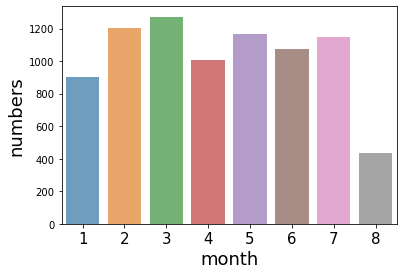

In [13]:
ax = sns.barplot(x = label, y = m, alpha = 0.7)

ax.set_xticklabels(labels= label, fontsize=15)
ax.set_xlabel("month", fontsize = 18)
ax.set_ylabel("numbers", fontsize = 18)
plt.show()

## 워드클라우드

In [10]:
from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.tag import Twitter

kkma = Kkma()
o = Okt()
t = Twitter()

icon = Image.open('circle.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
rc('font', family='NanumBarunGothic')

In [47]:
def mk_cloud (month,color) :
    # 월별 키워드 추출
    target = sd[sd['month']== month]
    tokenized_nouns = [list(zip((sentence),(sentence)[1:])) for sentence in target.w.values]

    counter = Counter()
    for i in tokenized_nouns: 
        counter.update(Counter(i))
    mc = counter.most_common()
    
    wlist = []
    for i in mc:
        wlist.extend([i[0][0]+i[0][1]]* i[1])
    
    # 워드클라우드 
    wcloud = ' '.join(wlist)
    fname = 'fig'+str(month)+'.png'
    
    text = wcloud
    wordcloud = WordCloud(max_font_size=200, font_path ="c:/Windows/Fonts/malgun.ttf",
                      min_font_size = 20, mask = mask,
                      width=400, height=200, colormap = color,
                     margin = 2,collocations=False, 
                      background_color = 'white').generate(text)
    
    fig = plt.figure(figsize = (30,30) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show
    plt.savefig(fname)
    
    return

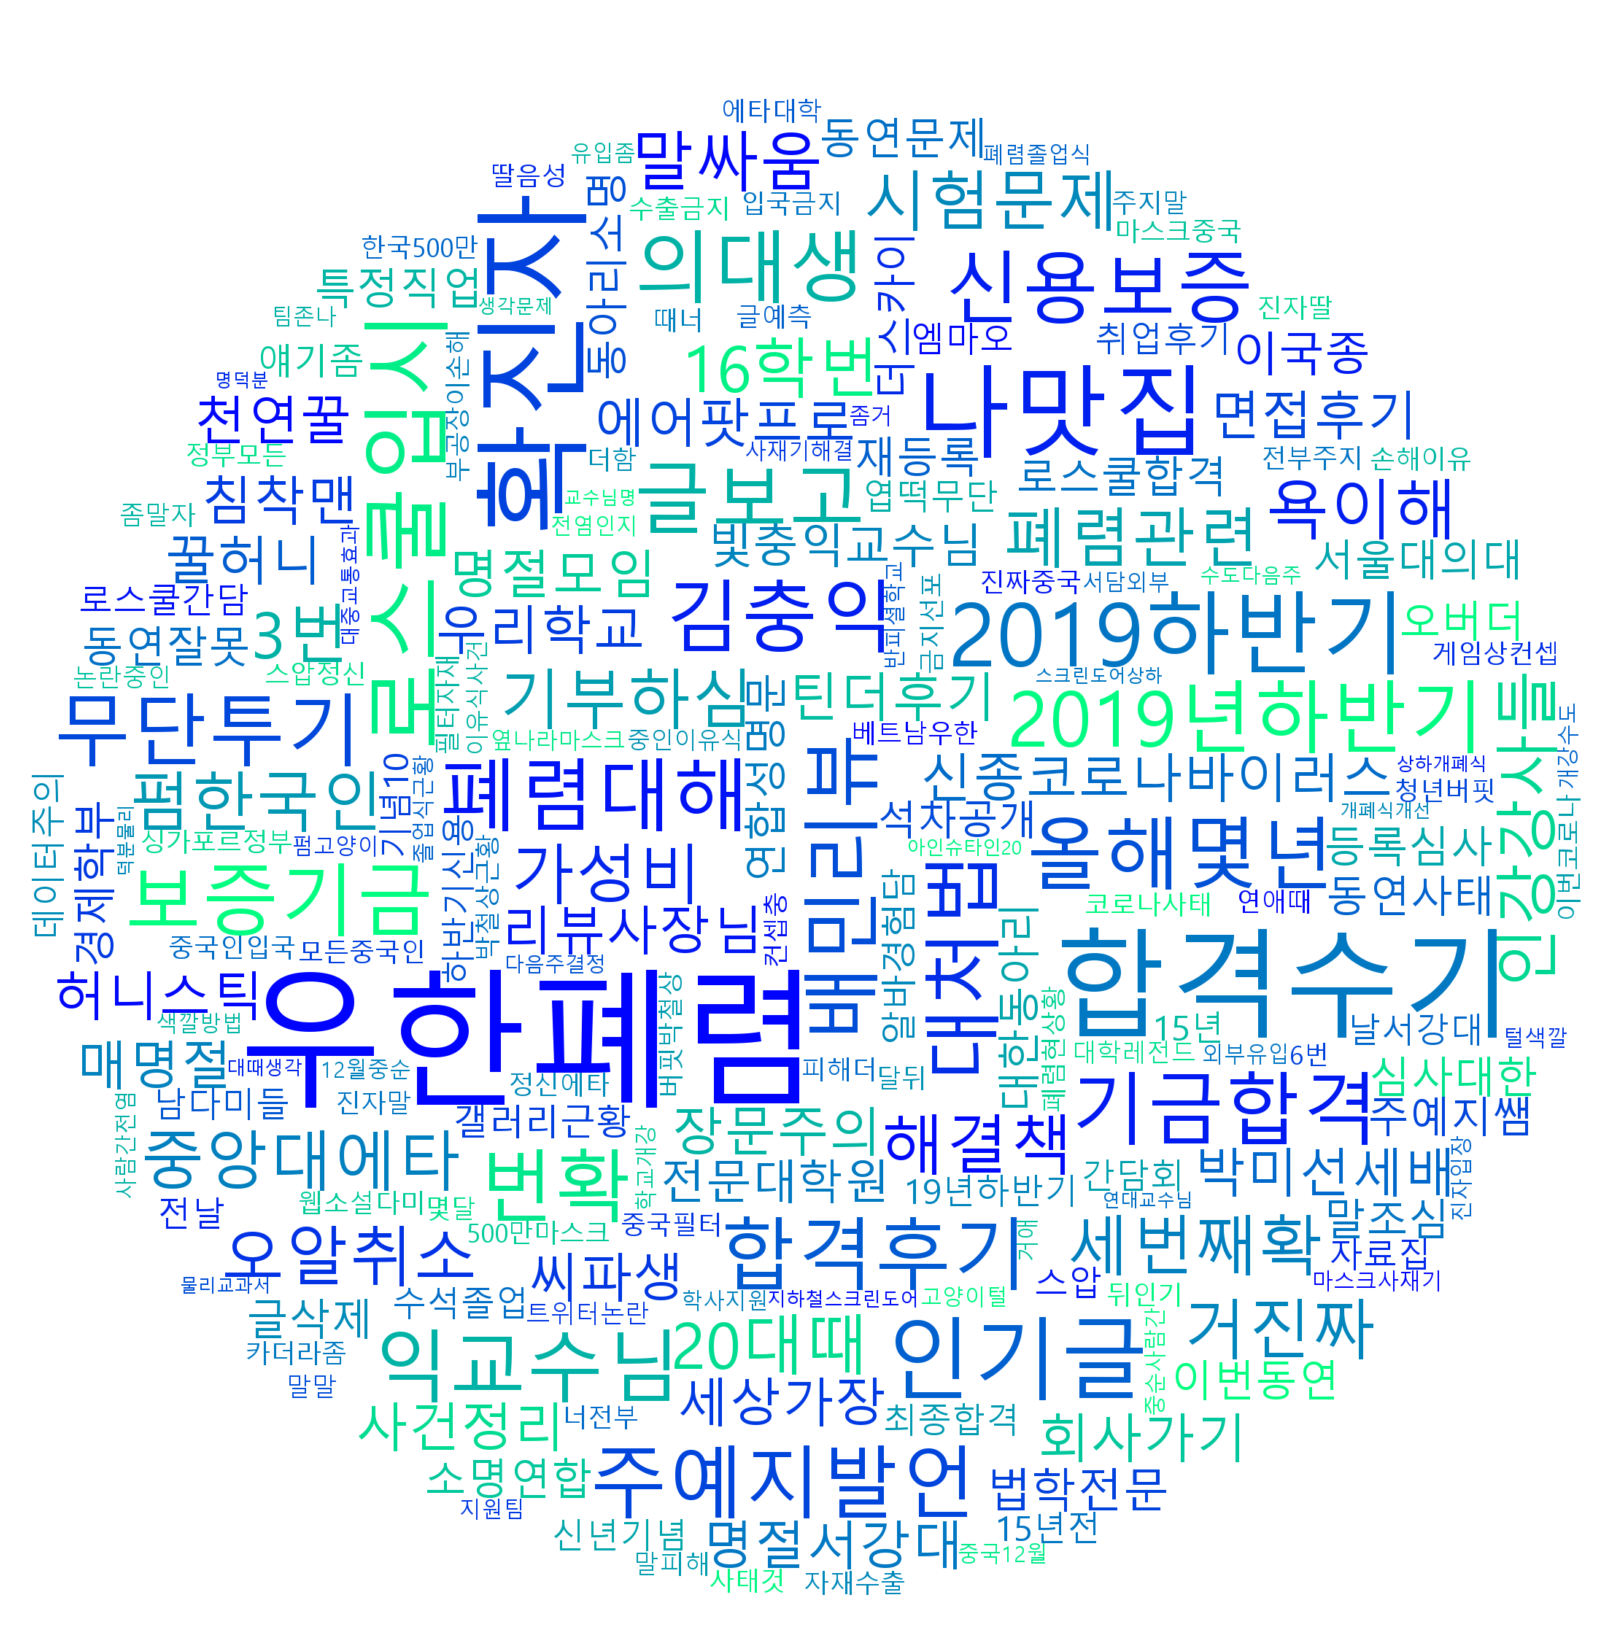

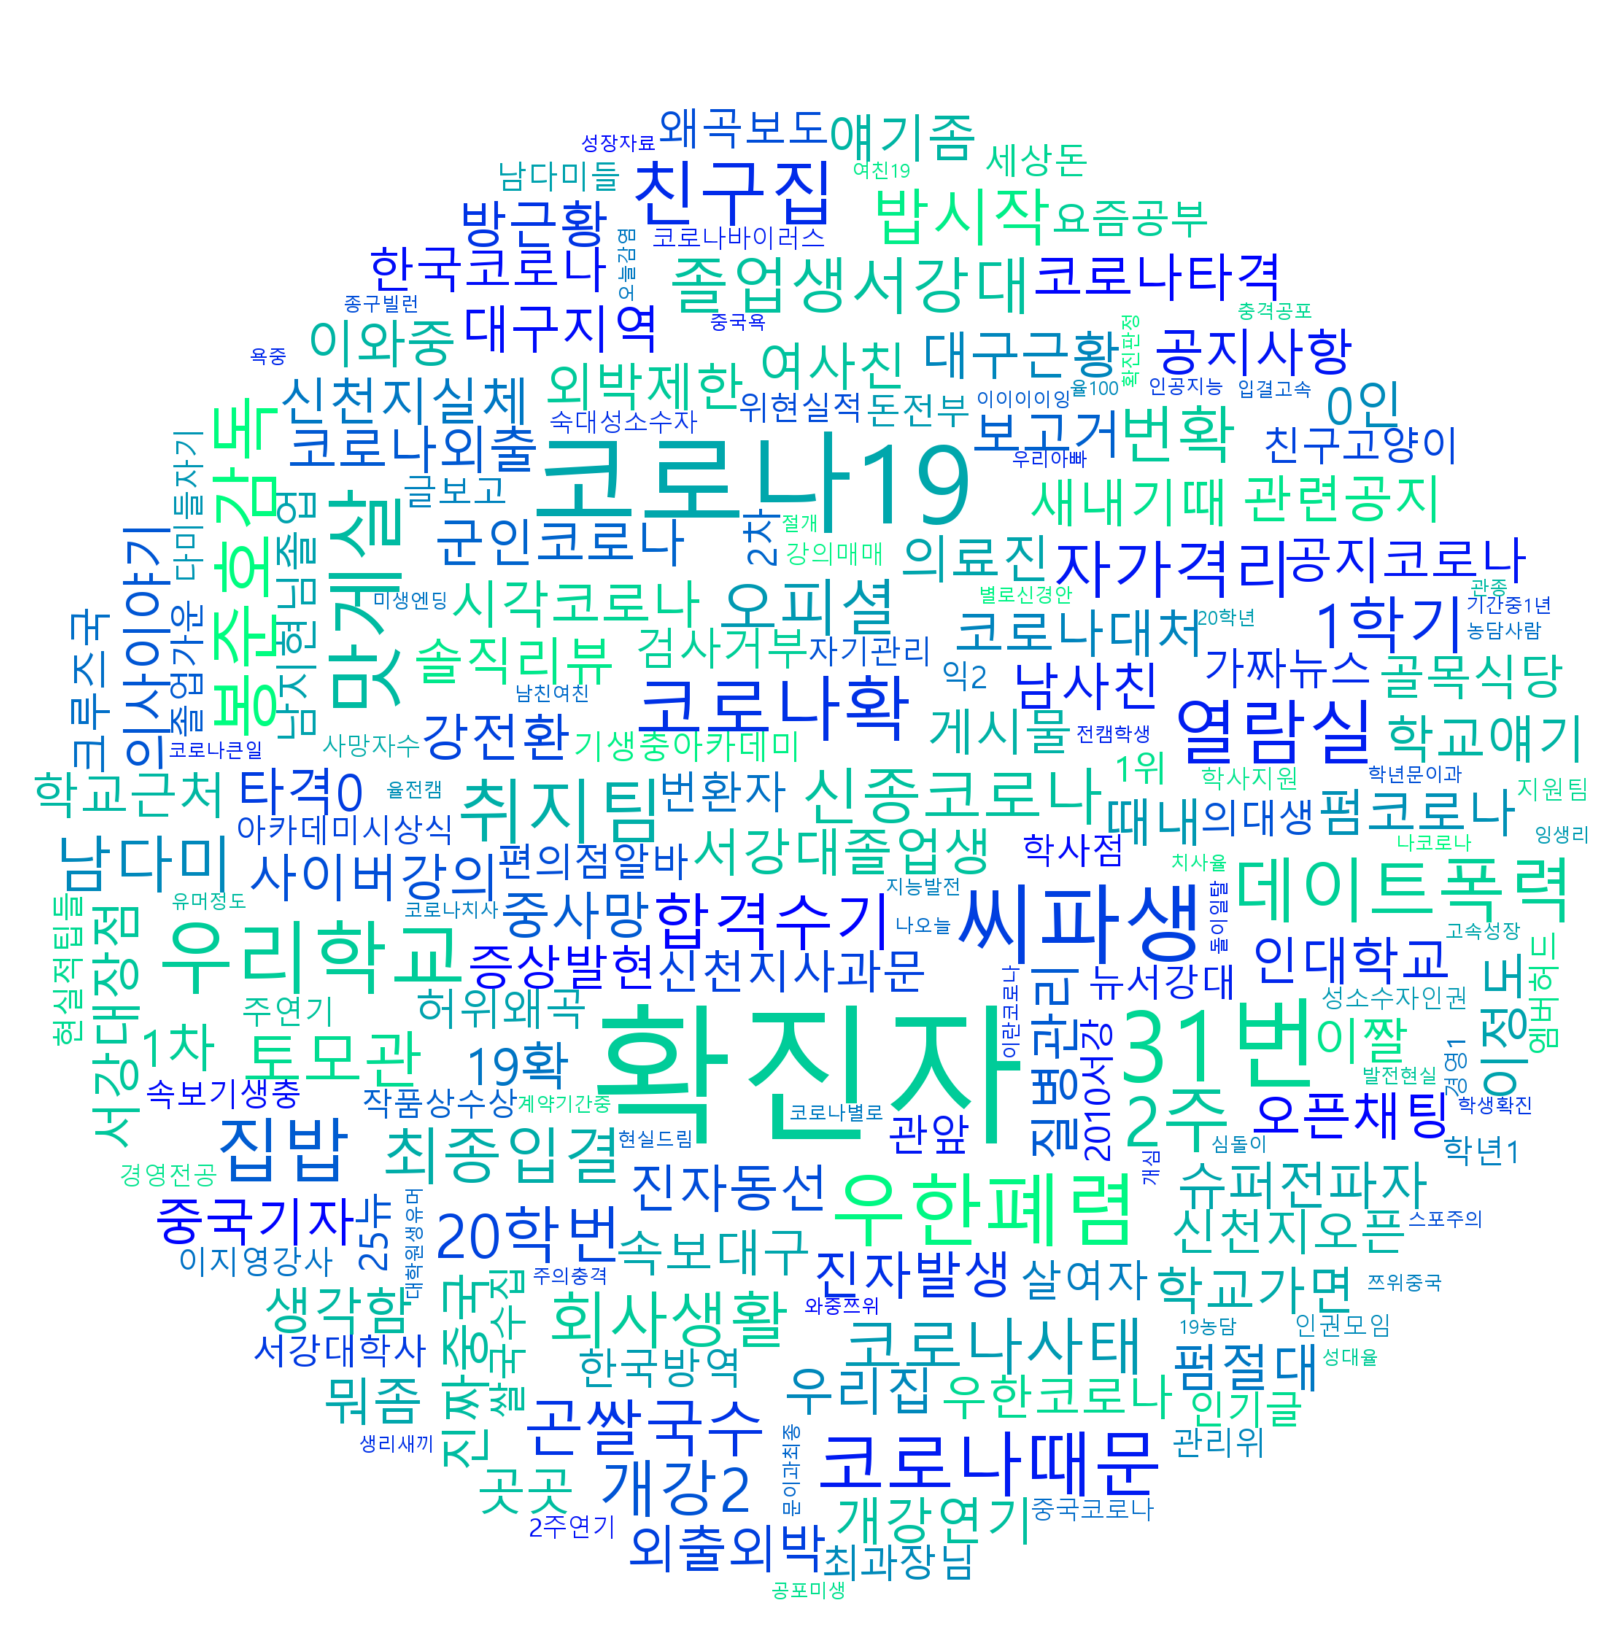

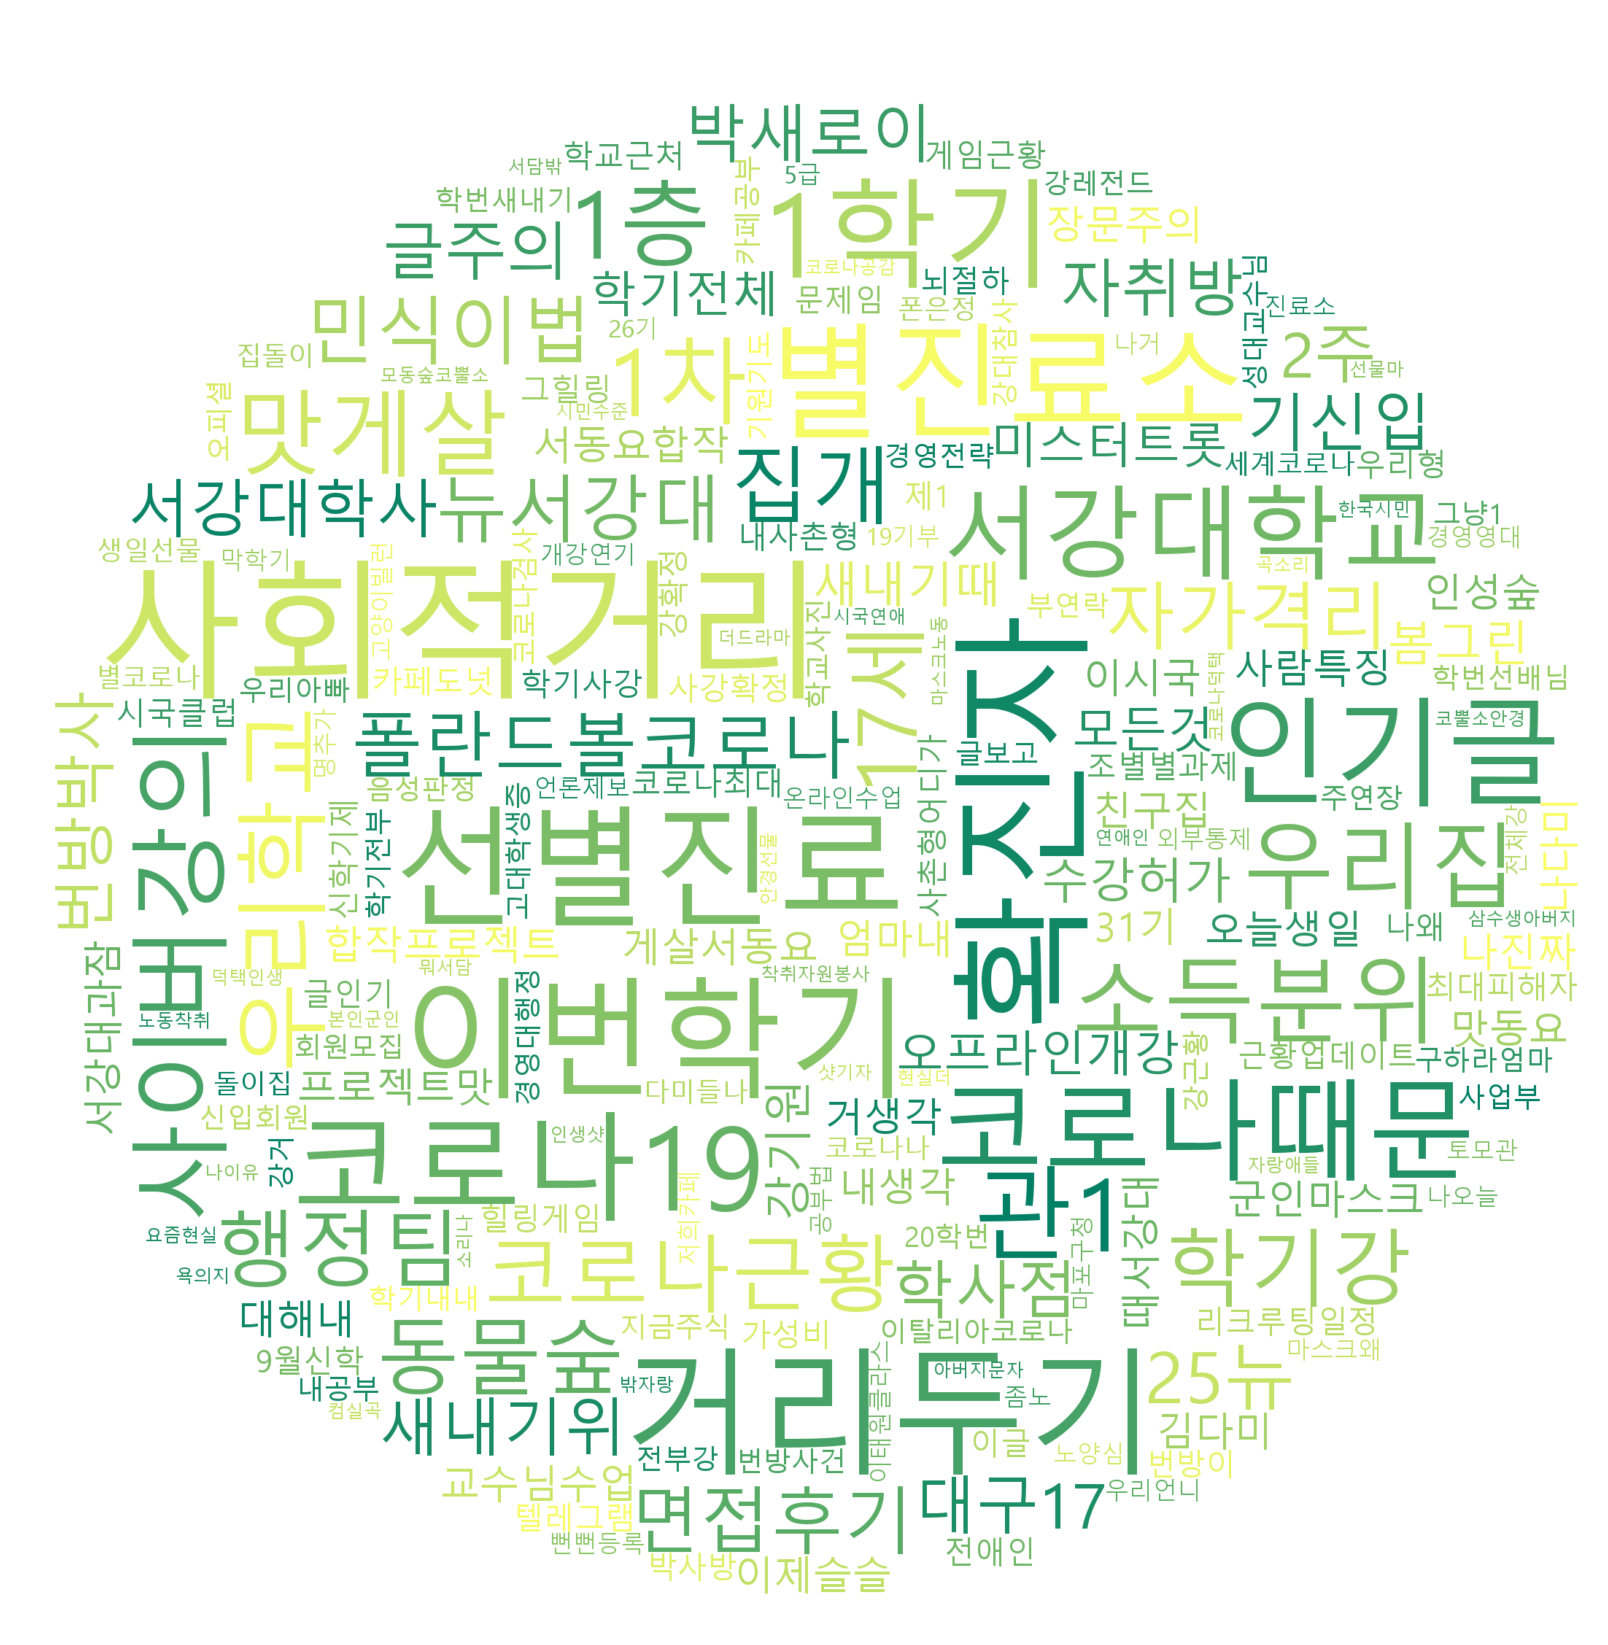

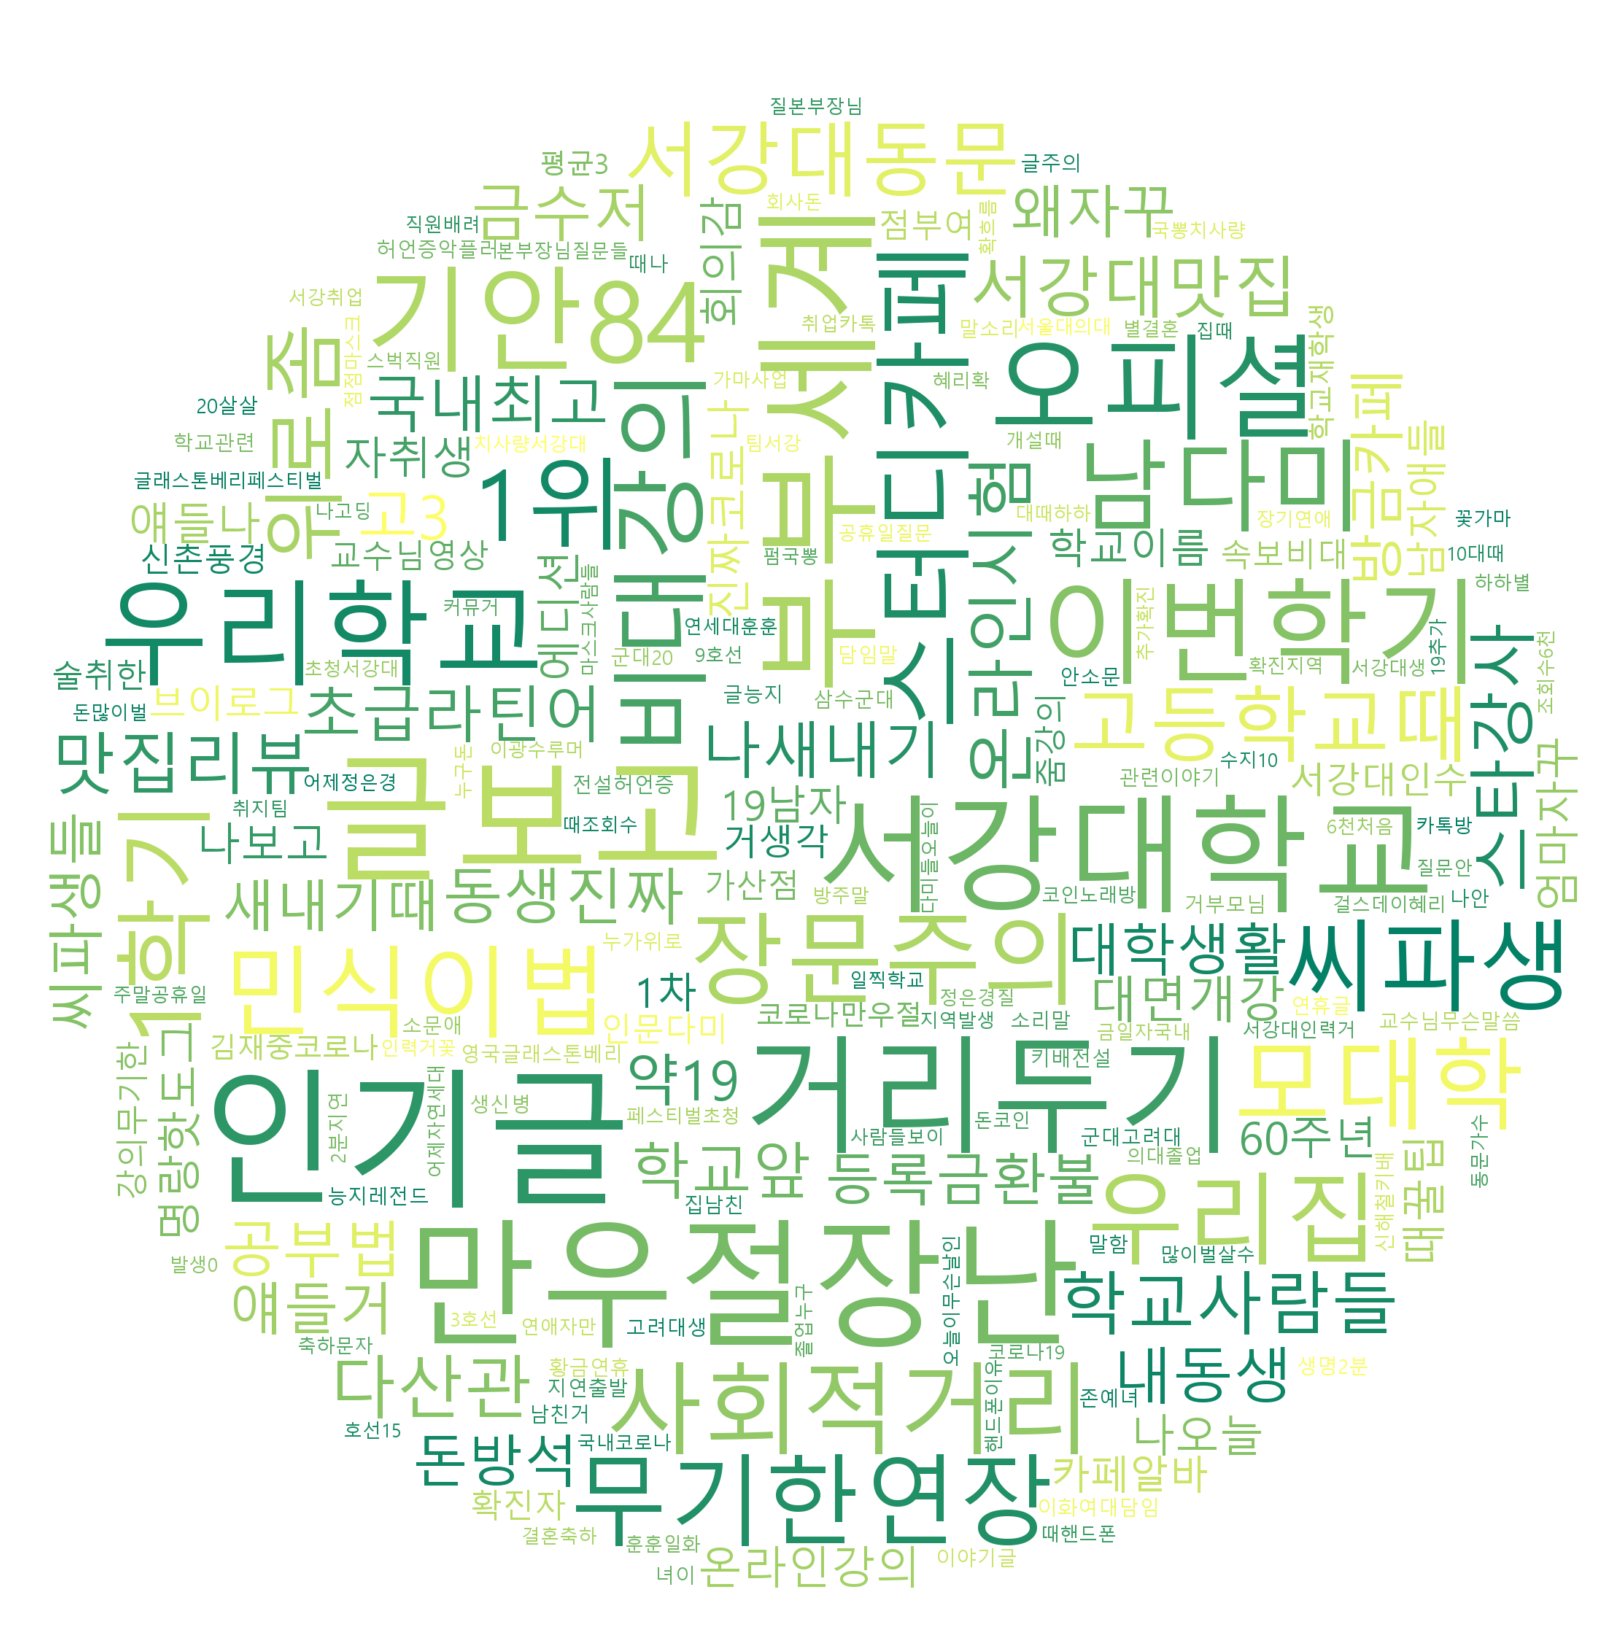

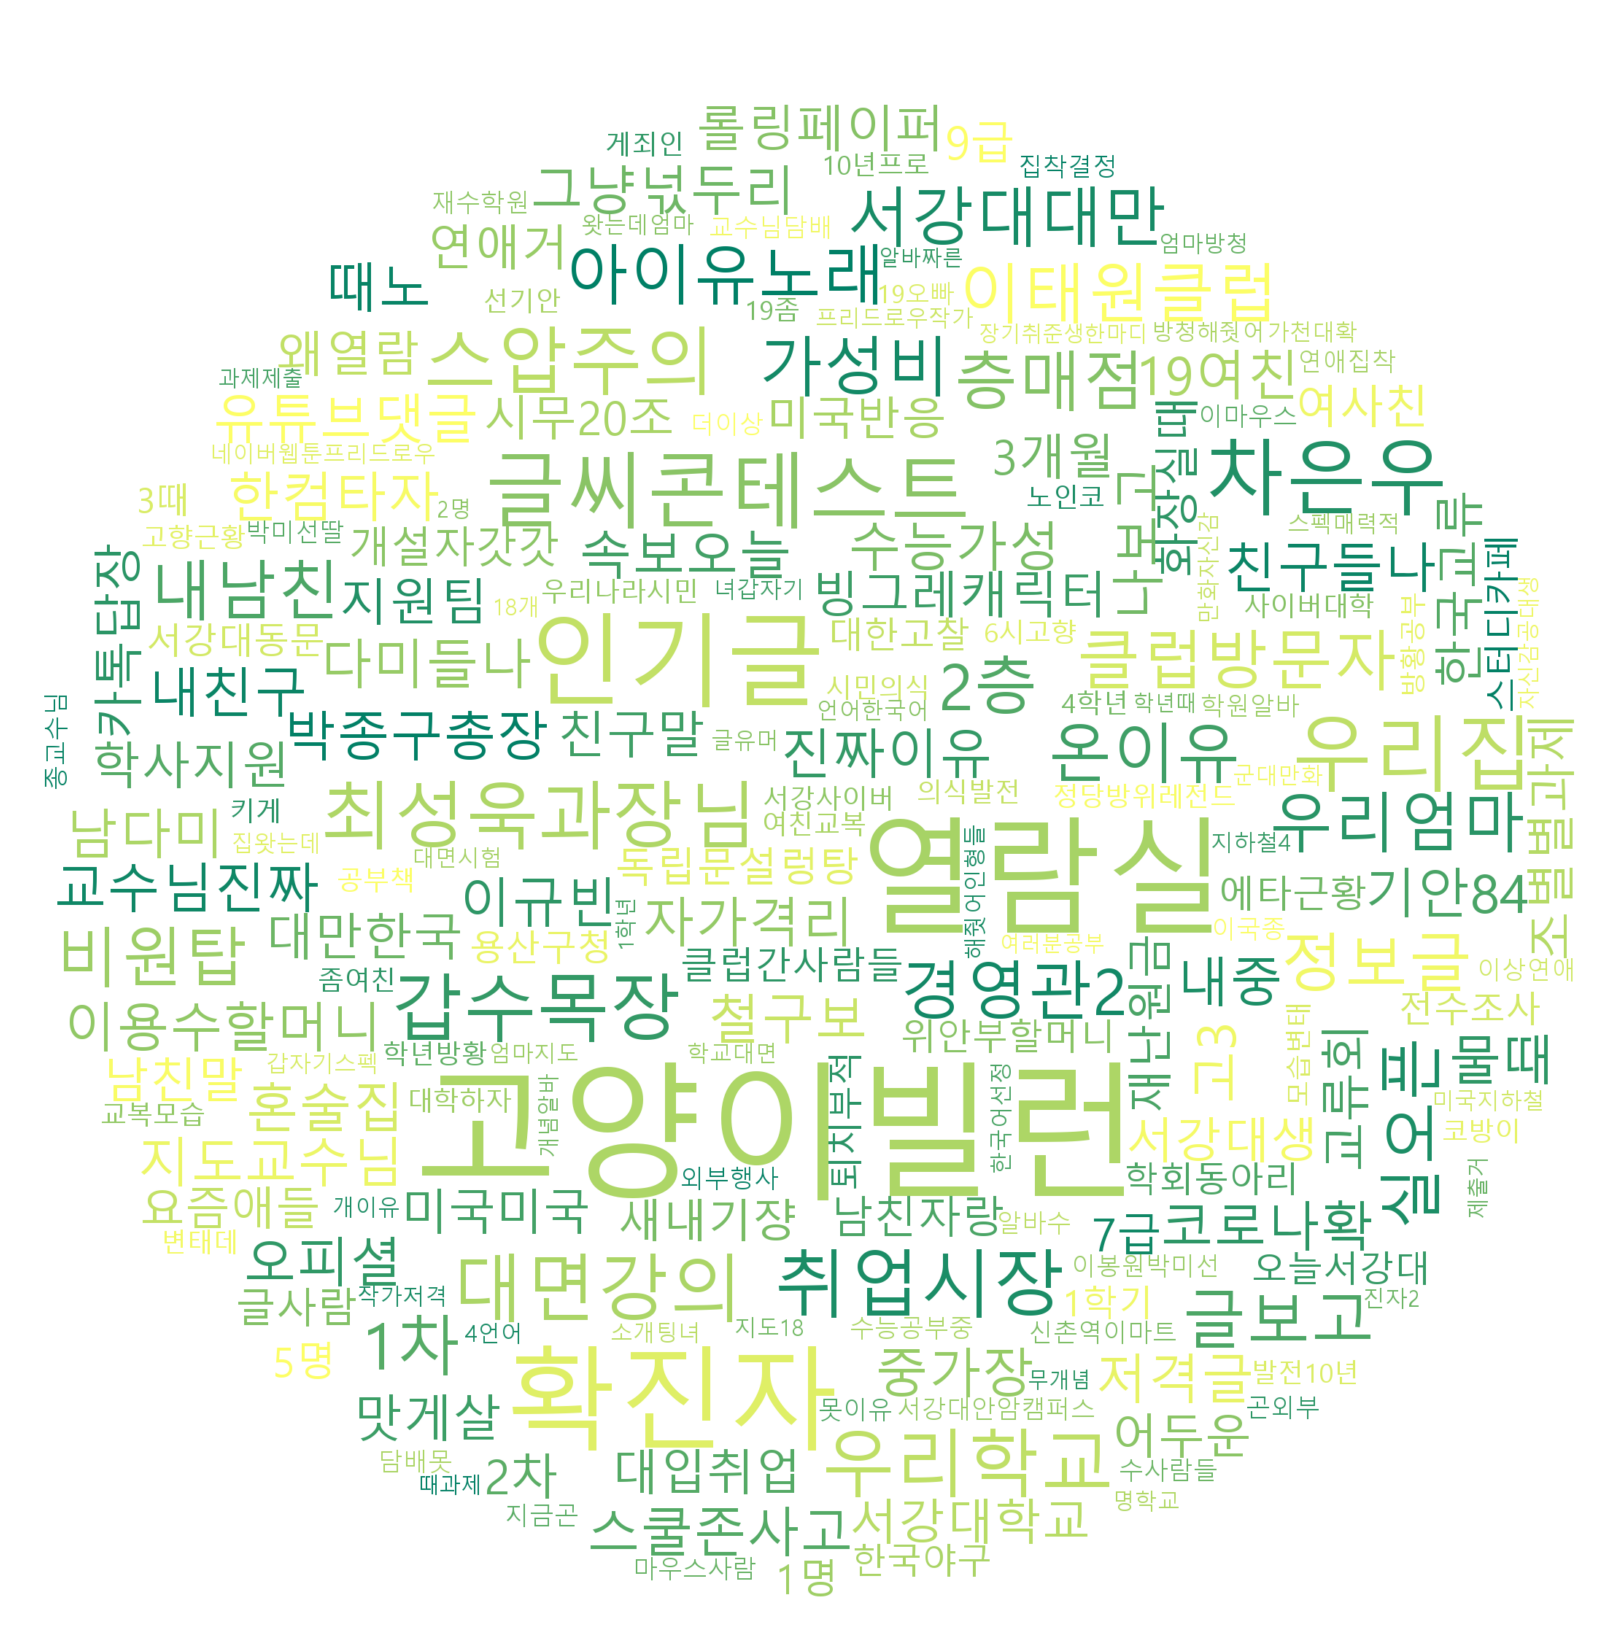

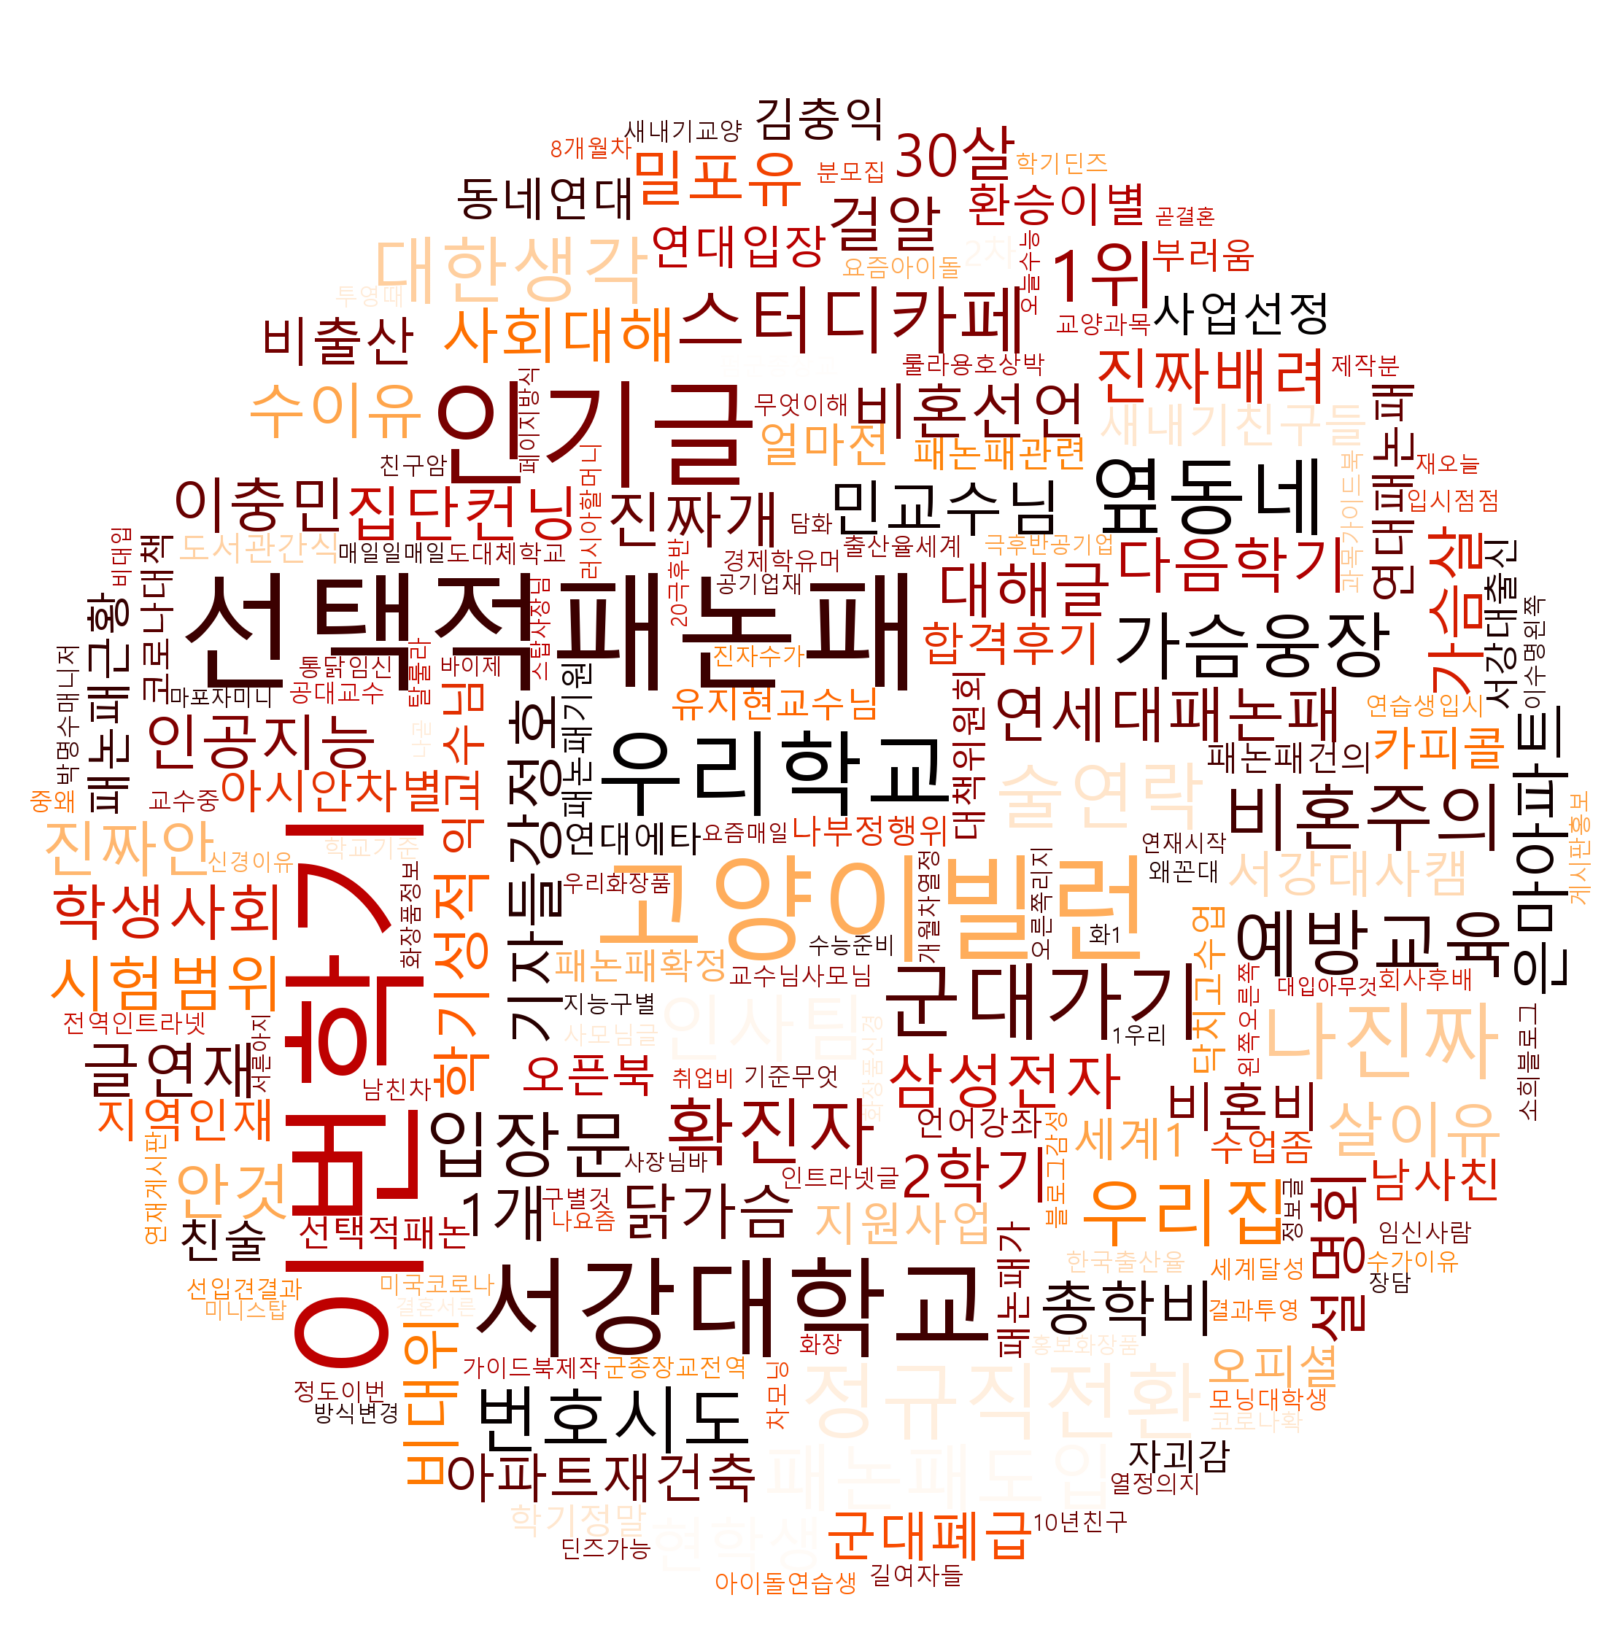

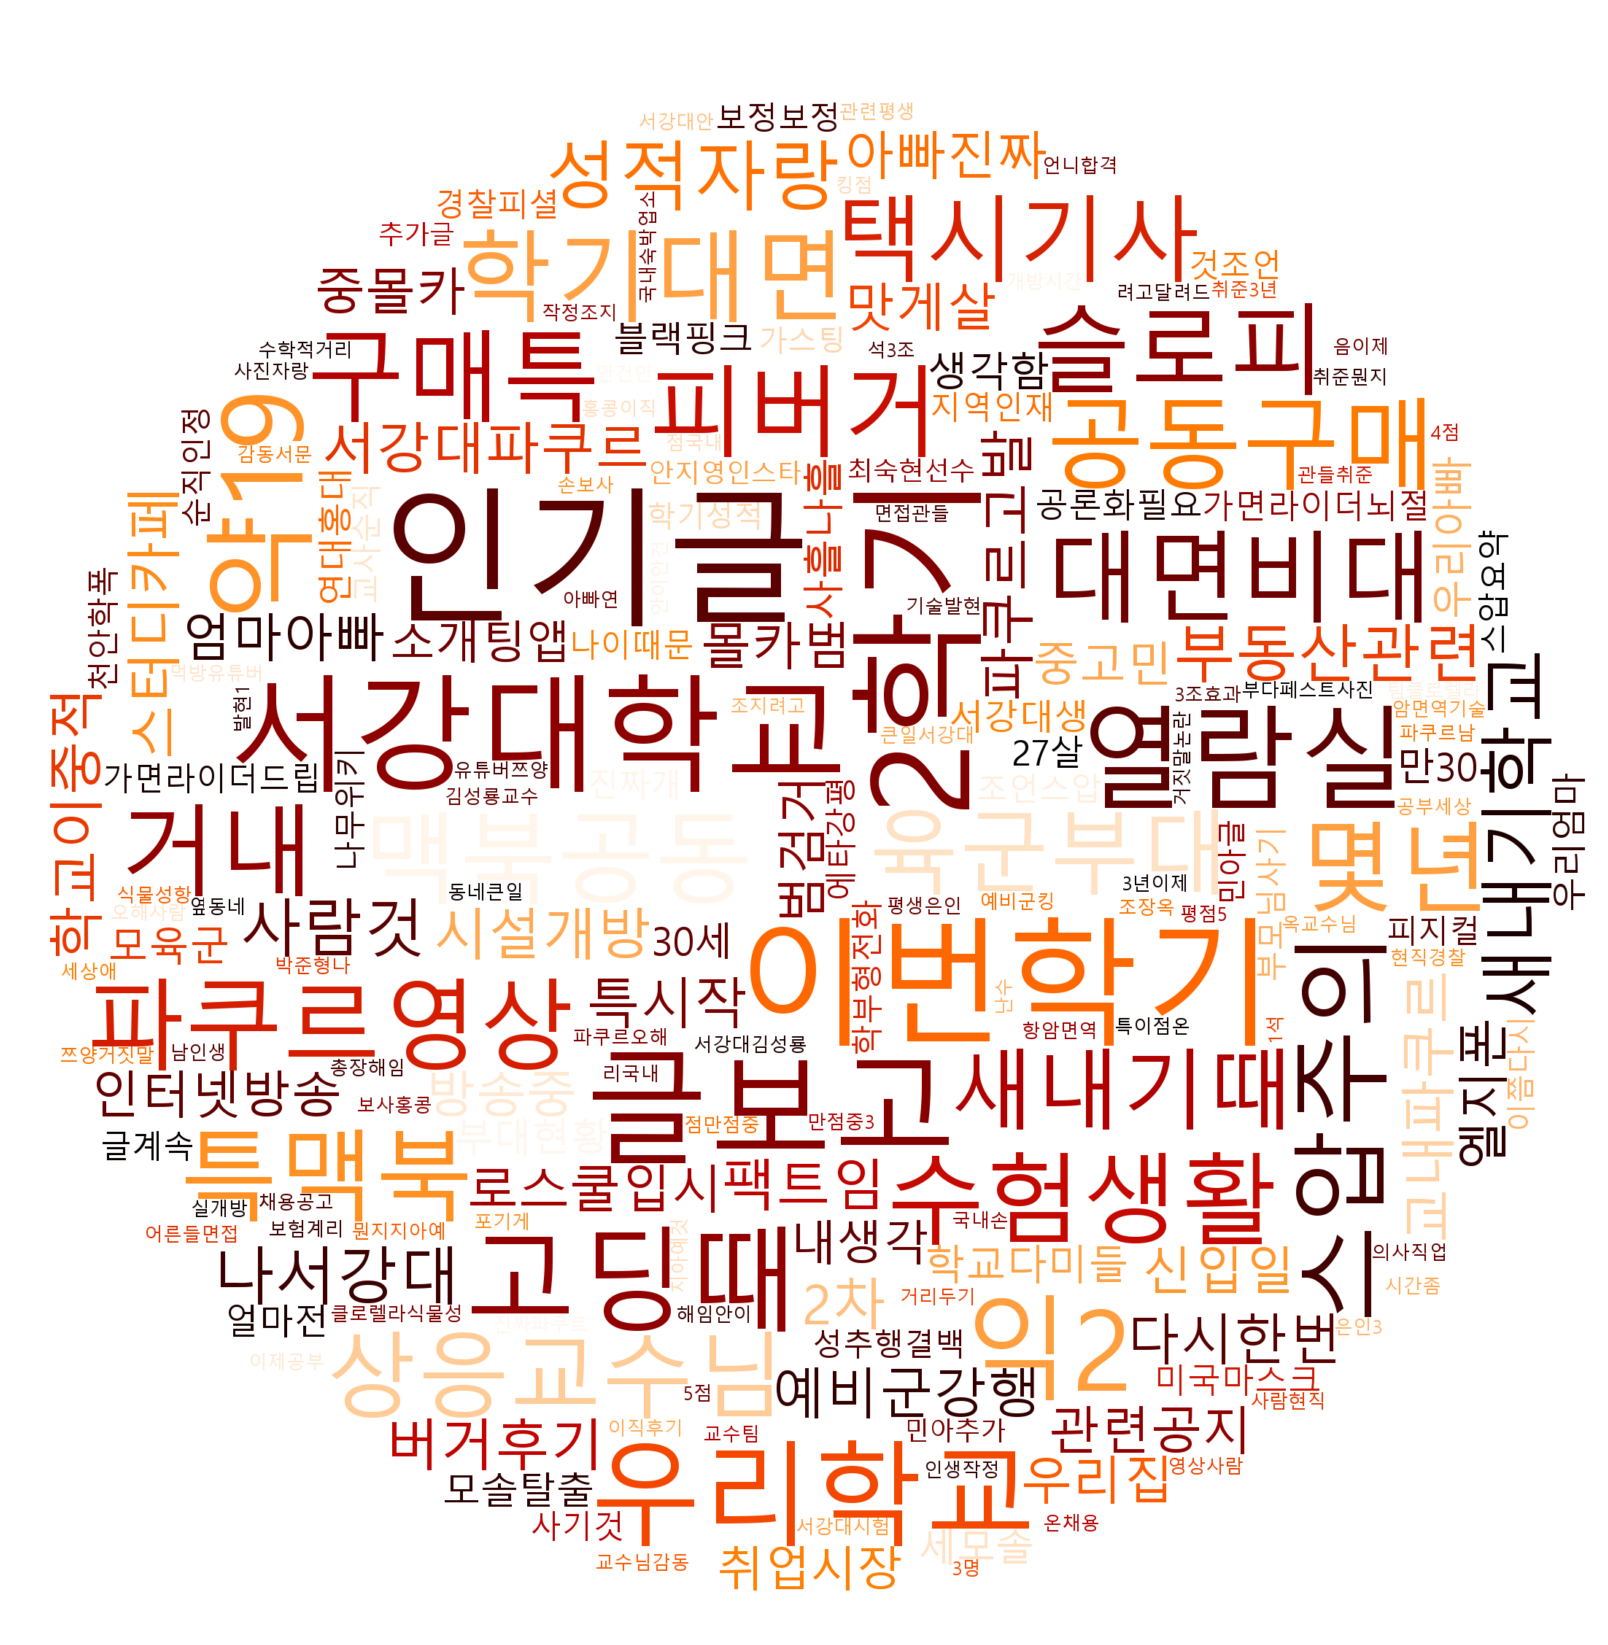

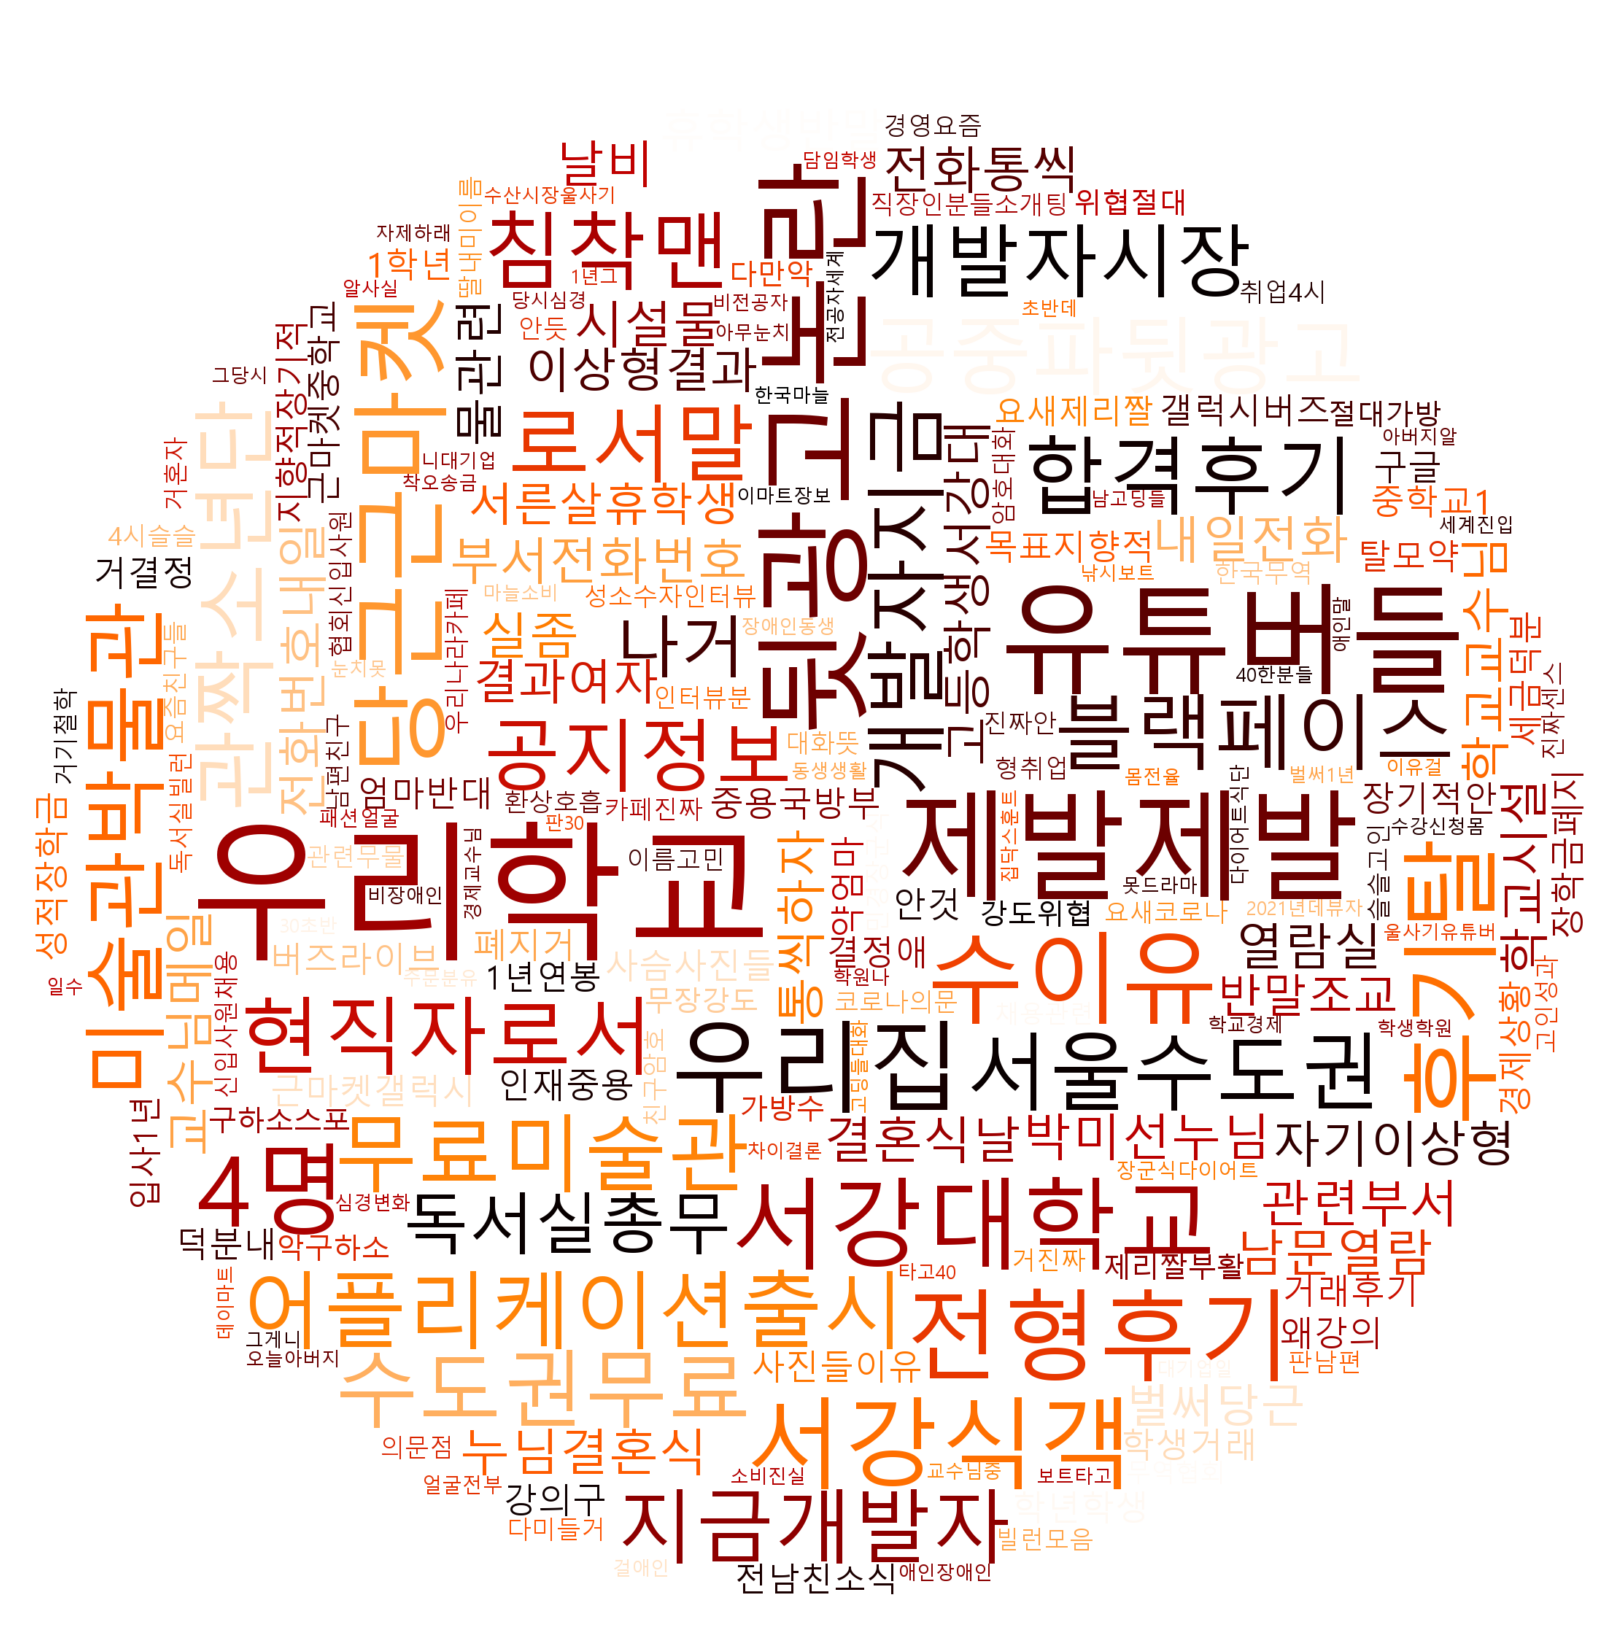

In [48]:
mk_cloud(1,'winter')
mk_cloud(2,'winter')

mk_cloud(3,'summer')
mk_cloud(4,'summer')
mk_cloud(5,'summer')

mk_cloud(6,'gist_heat')
mk_cloud(7,'gist_heat')
mk_cloud(8,'gist_heat')

## 키워드 군집화

In [36]:
from gensim.models import Word2Vec
from gensim.models.keyedvectors import WordEmbeddingsKeyedVectors
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
from tqdm import tqdm
tqdm.pandas()

c:\users\samsung\appdata\local\programs\python\python37\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [29]:
tmpp = pd.DataFrame()
sd['text'] = sd['text'].fillna('NaN')

for i in sd.index:
    if sd['text'][i] == 'NaN':
        sd['text'][i] = sd['title'][i]

c:\users\samsung\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
sd['text'] = sd['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣, \d, % ]","")

In [31]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','하다','ㅋ']
t = Twitter()
def text_tokenize (x) :
    temp_X = t.nouns(x) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    return temp_X

In [38]:
sd['total'] = sd.text.progress_apply(lambda x : text_tokenize(x))

100%|██████████████████████████████████████████████████████████████████████████████| 8219/8219 [02:09<00:00, 63.68it/s]


In [39]:
sd

Unnamed: 0                                 title header  comment_num  \
0              0            도대체가 학교의 기준이 무엇인지 이해가 안됩니다    NaN           14   
1              1  학교 시설물 관련 부서 전화번호 적을테니 내일부터 전화 한통씩하자    NaN           10   
2              2                        걍 서강사이버대학으로 하자    NaN           10   
3              3                             학교 너무 빡친다     쉐복           54   
4              4                    박미선 누님 결혼식날 비 오셨죠?    NaN            2   
...          ...                                   ...    ...          ...   
8214        8214                            새해맞이 연게 첫글    NaN            5   
8215        8215                            올해는 행시합격한다    NaN            5   
8216        8216                     ??? : 야 올해가 몇년이냐?    NaN            9   
8217        8217                        2020년 서강의 첫 모습    NaN            5   
8218        8218                           2020년 파이팅!!    NaN           15   

     writer  like upload_date  view  \
0        익명    32       46분 전   429   
1        익명    38       48분 전   577   
2        익명    42       55분 전   564   
3        익명   106       18:24  1830   
4        익명    40       17:44   824   
...     ...   ...         ...   ...   
8214     익명    35       01/01   785   
8215     익명    86       01/01  1180   
8216     익명   127       01/01  1982   
8217     익명   101       01/01  1931   
8218     익명   168       01/01  1335   

                                                   link  borad  \
0     http://www.ssodam.com//content/980179?prev=1&p...    CPA   
1     http://www.ssodam.com//content/980177?prev=1&p...    익게2   
2     http://www.ssodam.com//content/980173?prev=1&p...    익게2   
3     http://www.ssodam.com//content/980162?prev=1&p...    익게2   
4     http://www.ssodam.com//content/980129?prev=1&p...    익게2   
...                                                 ...    ...   
8214  http://www.ssodam.com//content/813081?prev=245...  연애상담소   
8215  http://www.ssodam.com//content/813062?prev=245...    익게2   
8216  http://www.ssodam.com//content/813058?prev=245...    익게2   
8217  http://www.ssodam.com//content/813047?prev=245...    익게2   
8218  http://www.ssodam.com//content/813032?prev=245...    익게2   

                                                   text  dislike  \
0     교육부 방역수칙이 도대체 어떤 점에서 어떻게 미달이 되는데요 이걸 알려주셔야죠미달이...        0   
1     코로나 이후로 전화 자주하는편인데 나도 처음에 어디로 전화해야할지도 막막하고 그래서...        3   
2     학교 부지는 외부인 등산하게 냅두고운동장 농구장은 외부인들한테 24시간 무료개방하고...        7   
3     다른 학교는 감염 위험이 없어서 시설 개방하는 줄 아냐 아니 등록금은 다 쳐받아놓고...       13   
4                                    마지막 ㅋ 하나 붙인게 킬포ㅋㅋㅋ        1   
...                                                 ...      ...   
8214                                 다들 올해는 인생의 단짝을 만나용        0   
8215  토모관 여러분도                                토모관 밖 ...        0   
8216                                             다들 새해복        0   
8217  방금 토모관에서 나와서 찍어봤어20대의 절반을 서강과 함께할수 있어서 진심으로 행복...        0   
8218                                            모두들 파이팅        0   

                                                comment            date_time  \
0     [['근데 아직 확정?은 아니지 않나요 아직까지는 그냥 누군가가 그렇다더라니까 기다...  2020-08-13 19:01:00   
1     [['저런 곳보다 대책회의쪽이 더 확실할텐데 총학도 회의에 몇번 참관한걸로 아는데 ...  2020-08-13 18:59:00   
2     [['그만•••'], ['뭘 그만하라는거야?'], ['이런 댓글이야 말로 그만......  2020-08-13 18:52:00   
3     [['교육부 지침에 안맞으면 못여는건가?'], ['어떻게 다른대학들은 5~6월에 고...  2020-08-13 18:24:00   
4     [['난 오셨다길래 정지훈 얘기하는 줄'], ['??? : 모르는데 어떻게가요'],...  2020-08-13 17:44:00   
...                                                 ...                  ...   
8214  [['네에 ㅠㅠ 올해는 정말 행복하고 싶어요.. 님두 좋은 인연 만나서 행복하세요 ...  2020-01-01 00:24:00   
8215  [['나도 행시 올 해 붙는다!'], ['나도 올해 붙는다!'], ['민특상디 사례...  2020-01-01 00:08:00   
8216  [['좌우로 정렬해주세여'], ['ㅁㅊ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 적절한 짤 추'], ['...  2020-01-01 00:06:00   
8217  [['나도 방금 나왔는데 ㅎㅎㅎ 다미 본듯'], ['내년에는 좋은 소식만 들리자!!...  2020-01-01 00:04:00   
8218  [['올 첫글 ㅋㅋ'], ['아 너 뭔데 나보다 일찍 썼냐ㅡㅡ추천이나 먹어라'], ...  2020-01-01 00:00:00   

      hour                   

In [40]:
def get_wordlst (t,w):
    
    try :
        return w + t.split()
    except :
        return w

In [41]:
sd['wlst'] = sd.apply(lambda x: get_wordlst(x['text'],x['w']),axis =1)

In [42]:
w2v_model = Word2Vec(sd['wlst'].values, min_count = 30, size = 100, window = 5, sg = 1, workers = 4)
w2v_model.save("w1.model")

In [43]:
w2v_model.most_similar('코로나')

c:\users\samsung\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('중국', 0.9129724502563477),
 ('확진자', 0.8937947154045105),
 ('신천지', 0.8780699968338013),
 ('확', 0.873738169670105),
 ('미국', 0.8616059422492981),
 ('일본', 0.8519088625907898),
 ('진자', 0.845043420791626),
 ('우한', 0.8434444665908813),
 ('검사', 0.841628909111023),
 ('대구', 0.830938458442688)]

In [44]:
word_vectors = w2v_model.wv.syn0
w2v_model.wv.syn0.shape

c:\users\samsung\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.
c:\users\samsung\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


(1706, 100)

In [52]:
num_clusters = 10 #cluster의 갯수 산정
kmeans_clustering = KMeans( n_clusters = num_clusters )

In [53]:
idx = kmeans_clustering.fit_predict(word_vectors)

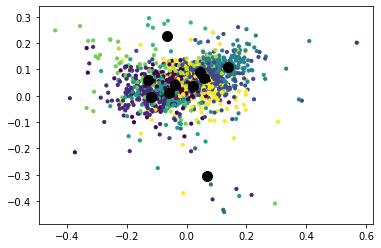

In [54]:
# K-means 시각화 파트
plt.scatter(word_vectors[:, 0], word_vectors[:, 1], c=idx, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100);

In [55]:
idx = list(idx)
names = w2v_model.wv.index2word 
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}
word_centroid_map

{'수': 5,
 '내가': 4,
 '그': 9,
 '너무': 2,
 '것': 9,
 '다': 2,
 '진짜': 4,
 '더': 9,
 '잘': 2,
 '있는': 9,
 '한': 0,
 '이': 9,
 '많이': 9,
 '좀': 2,
 '내': 4,
 '안': 2,
 '그냥': 4,
 '때': 0,
 '하고': 2,
 '거': 2,
 '정말': 9,
 '하는': 9,
 '나': 8,
 '나는': 2,
 '다른': 9,
 '왜': 4,
 '학교': 0,
 '할': 9,
 '이런': 2,
 '난': 4,
 '지금': 2,
 '대한': 5,
 '서강대': 7,
 '글': 0,
 '같은': 9,
 '또': 2,
 '게': 9,
 '계속': 4,
 '사람': 2,
 '우리': 8,
 '어떻게': 9,
 '이렇게': 2,
 '때문에': 9,
 '좋은': 9,
 '그리고': 9,
 '다시': 2,
 '많은': 5,
 '없는': 9,
 '보고': 8,
 '오늘': 8,
 '같이': 2,
 '그래서': 2,
 '못': 2,
 '것도': 9,
 '근데': 4,
 '코로나': 7,
 '그렇게': 2,
 '어떤': 9,
 '뭐': 4,
 '말': 8,
 '중': 1,
 '나도': 4,
 '건': 2,
 '사람이': 9,
 '엄청': 4,
 '그런': 2,
 '및': 1,
 '큰': 9,
 '위해': 5,
 '이제': 2,
 '거의': 2,
 '바로': 2,
 '가장': 5,
 '것이': 5,
 '보면': 2,
 '열심히': 2,
 '모든': 5,
 '있습니다': 5,
 '갑자기': 4,
 '등': 1,
 '대해': 5,
 '아니라': 9,
 '해서': 2,
 '제가': 5,
 '저는': 5,
 '이유': 7,
 '1': 7,
 '될': 5,
 '꼭': 0,
 '시험': 0,
 '그래도': 2,
 '경우': 5,
 '제': 5,
 '하면': 2,
 '걸': 9,
 '모두': 5,
 '저': 2,
 '관련': 1,
 '하나': 8,
 '일': 2,
 '정도': 2,
 '번': 0,
 

In [56]:
for cluster in range(0,num_clusters):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))): #list(dict)키 값만 리스트로 반환
        #list(dict.values)는 value값이 리스트로 반환
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['한', '때', '학교', '글', '꼭', '시험', '번', '교수님', '몇', '두', '전에', '수업', '전', '시간', '대학', '동안', '취업', '가', '중에', '첫', '본', '받고', '간', '댓글', '다음', '그대로', '당시', '올해', '마지막', '보니', '온', '쓴', '약', '전부', '본인', '나온', '학교에', '있던', '법', '하루', '학교에서', '와', '이번에', '분', '곳', '분들', '세', '사건', '1년', '학생들', '과제', '방법', '서담에', '글이', '대신', '남은', '사회적', '우리나라', '교수님이', '책', '영어', '추천', '고등학교', '병원', '학교는', '등록금', '영상', '질문', '과', '달', '수능', '기준', '소개팅', '벌써', '대기업', '봄', '곧', '들은', '학원', '도', '최소', '감사합니다', '네', '대학교', '취준', '새로', '보기', '가족', '맛', '일반', '경험', '학생이', '만든', '동시에', '인터넷', '속', '언제', '차이', '최근에', '글은', '의사', '근처', '2년', '서담에서', '운동', '새', '새내기들', '대한민국', '건물', '참고', '참고로', '연봉', '상황을', '은', '싸강', '나머지', '본인은', '들어와서', '올린', '모습', '광고', '만', '선', '열람실', '작년에', '삼성', '매년', '시험이', '다니면서', '시절', '10년', '네이버', '영화', '줌', '몇몇', '물', '관련해서', '거리', '안에서', '빼고', '공무원', '긴', '정', '도서관', '의견', '까지', '문자', '예전', '커뮤니티', '부터', '곤자가', '총학', '고시', '외부인', '1시간', '수준', '기숙사', '학과', '하던', '선생님', '잠시', 